In [32]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

### Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.

In [2]:
data = pd.read_csv('abalone.csv')

In [3]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1. 

In [4]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [5]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная, в остальных — признаки.

In [6]:
y = data['Rings']
X = data.drop(['Rings'], axis=1)

### Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

### Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.

In [36]:
cv = KFold(n_splits=5, shuffle=True, random_state=1)

In [44]:
answer = None
for n in range(1, 51):
    rfr = RandomForestRegressor(n_estimators=n, random_state=1)
    val = cross_val_score(rfr, X, y, scoring='r2', cv=cv).mean()
    if(round(val, 2) > 0.52):
        answer = n
        print('{}: {}'.format(n, val))
        break

28: 0.5256557724971402


In [45]:
with open('answer.txt', 'w') as file:
    file.write(str(answer))

### Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

In [31]:
vals = []
for n in range(1, 51):
    rfr = RandomForestRegressor(n_estimators=n, random_state=1)
    vals.append(cross_val_score(rfr, X, y, scoring='r2_score', cv=cv).mean())

Text(0, 0.5, 'cross_val_score')

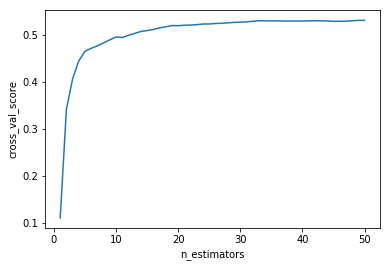

In [35]:
plt.plot(np.arange(1,51), vals)
plt.xlabel('n_estimators')
plt.ylabel('cross_val_score')

+ <b>Нет, с ростом числа деревьев качество выходит на асимптотический уровень</b>